## House Price Prediction Using Pytorch

In [1]:
import pandas as pd
df = pd.read_csv('houseprice.csv',usecols=["SalePrice","MSSubClass","MSZoning","LotFrontage","LotArea","Street","YearBuilt","LotShape","1stFlrSF","2ndFlrSF"]).dropna()

In [2]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [3]:
df.shape

(1201, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [5]:
for i in df.columns:
    print("Colum name{} and unique values are {}".format(i,len(df[i].unique())))

Colum nameMSSubClass and unique values are 15
Colum nameMSZoning and unique values are 5
Colum nameLotFrontage and unique values are 110
Colum nameLotArea and unique values are 869
Colum nameStreet and unique values are 2
Colum nameLotShape and unique values are 4
Colum nameYearBuilt and unique values are 112
Colum name1stFlrSF and unique values are 678
Colum name2ndFlrSF and unique values are 368
Colum nameSalePrice and unique values are 597


In [6]:
import datetime
datetime.datetime.now().year

2024

In [7]:
df['Total Years'] = datetime.datetime.now().year-df['YearBuilt']

In [8]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500,21
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500,48
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500,23
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000,109
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000,24


In [9]:
df.drop("YearBuilt",axis=1,inplace=True)

In [10]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'Total Years'],
      dtype='object')

In [11]:
cat_features= ["MSSubClass","MSZoning","Street","LotShape"]
out_feature="SalePrice"

In [12]:
df["MSSubClass"].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  80, 160,  75, 180,
        40,  85], dtype=int64)

In [13]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
lbl_encoders["MSSubClass"] = LabelEncoder()
lbl_encoders["MSSubClass"].fit_transform(df["MSSubClass"])

array([5, 0, 5, ..., 6, 0, 0], dtype=int64)

In [14]:
lbl_encoders

{'MSSubClass': LabelEncoder()}

In [15]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
for feature in cat_features:
    lbl_encoders[feature]= LabelEncoder()
    df[feature]=lbl_encoders[feature].fit_transform(df[feature])

In [16]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,5,3,65.0,8450,1,3,856,854,208500,21
1,0,3,80.0,9600,1,3,1262,0,181500,48
2,5,3,68.0,11250,1,0,920,866,223500,23
3,6,3,60.0,9550,1,0,961,756,140000,109
4,5,3,84.0,14260,1,0,1145,1053,250000,24
...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,7917,1,3,953,694,175000,25
1456,0,3,85.0,13175,1,3,2073,0,210000,46
1457,6,3,66.0,9042,1,3,1188,1152,266500,83
1458,0,3,68.0,9717,1,3,1078,0,142125,74


In [17]:
import numpy as np
cat_features=np.stack([df['MSSubClass'],df['MSZoning'],df['Street'],df['LotShape']],1)
cat_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]], dtype=int64)

In [18]:
import torch
cat_features=torch.tensor(cat_features,dtype=torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [19]:
cont_features=[]
for i in df.columns:
    if i in ["MSSubClass","MSZoning","Street","LotShape","SalePrice"]:
        pass
else:
    cont_features.append(i)

In [20]:
cont_features

['Total Years']

In [21]:
cont_values = np.stack([df[i].values for i in cont_features], axis=1)
cont_values = torch.tensor(cont_values, dtype=torch.float)
cont_values

tensor([[21.],
        [48.],
        [23.],
        ...,
        [83.],
        [74.],
        [59.]])

In [22]:
cont_values.dtype

torch.float32

In [23]:
y= torch.tensor(df['SalePrice'].values,dtype=torch.float).reshape(-1,1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   int32  
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   int32  
 5   LotShape     1201 non-null   int32  
 6   1stFlrSF     1201 non-null   int64  
 7   2ndFlrSF     1201 non-null   int64  
 8   SalePrice    1201 non-null   int64  
 9   Total Years  1201 non-null   int64  
dtypes: float64(1), int32(3), int64(6)
memory usage: 89.1 KB


In [25]:
cat_features.shape,cont_values.shape,y.shape

(torch.Size([1201, 4]), torch.Size([1201, 1]), torch.Size([1201, 1]))

In [26]:
len(df['MSSubClass'].unique())

15

In [27]:
cat_dims=[len(df[col].unique()) for col in ["MSSubClass", "MSZoning", "Street", "LotShape"]]

In [28]:
cat_dims

[15, 5, 2, 4]

In [29]:
embedding_dim= [(x, min(50, (x + 1) // 2)) for x in cat_dims]

In [30]:

embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [33]:
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [34]:
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [35]:
cat_featuresz=cat_features[:4]
cat_featuresz

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [36]:
pd.set_option('display.max_rows', 500)
embedding_val=[]
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_features[:,i]))

In [37]:
embedding_val

[tensor([[-4.2796e-01,  3.2346e-01,  1.4218e+00,  ..., -7.5163e-01,
          -2.7416e-03,  1.5637e+00],
         [ 1.8857e-01,  8.8226e-01,  2.4314e+00,  ...,  4.1981e-01,
          -3.6475e-01, -5.9250e-01],
         [-4.2796e-01,  3.2346e-01,  1.4218e+00,  ..., -7.5163e-01,
          -2.7416e-03,  1.5637e+00],
         ...,
         [-1.1424e-01, -3.1520e-01,  2.6323e-01,  ...,  1.7110e-03,
          -1.6817e-01, -3.0034e-01],
         [ 1.8857e-01,  8.8226e-01,  2.4314e+00,  ...,  4.1981e-01,
          -3.6475e-01, -5.9250e-01],
         [ 1.8857e-01,  8.8226e-01,  2.4314e+00,  ...,  4.1981e-01,
          -3.6475e-01, -5.9250e-01]], grad_fn=<EmbeddingBackward0>),
 tensor([[ 1.2820, -0.4660, -0.1582],
         [ 1.2820, -0.4660, -0.1582],
         [ 1.2820, -0.4660, -0.1582],
         ...,
         [ 1.2820, -0.4660, -0.1582],
         [ 1.2820, -0.4660, -0.1582],
         [ 1.2820, -0.4660, -0.1582]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.6117],
         [-0.6117],
         [

In [38]:
z = torch.cat(embedding_val, 1)
z

tensor([[-0.4280,  0.3235,  1.4218,  ..., -0.6117, -0.9506, -0.0552],
        [ 0.1886,  0.8823,  2.4314,  ..., -0.6117, -0.9506, -0.0552],
        [-0.4280,  0.3235,  1.4218,  ..., -0.6117,  0.4810,  1.6625],
        ...,
        [-0.1142, -0.3152,  0.2632,  ..., -0.6117, -0.9506, -0.0552],
        [ 0.1886,  0.8823,  2.4314,  ..., -0.6117, -0.9506, -0.0552],
        [ 0.1886,  0.8823,  2.4314,  ..., -0.6117, -0.9506, -0.0552]],
       grad_fn=<CatBackward0>)

In [39]:
droput=nn.Dropout(.4)

In [40]:
final_embed=droput(z)
final_embed

tensor([[-0.0000,  0.5391,  0.0000,  ..., -1.0195, -1.5844, -0.0920],
        [ 0.3143,  1.4704,  4.0523,  ..., -0.0000, -0.0000, -0.0920],
        [-0.7133,  0.5391,  2.3697,  ..., -1.0195,  0.8017,  2.7708],
        ...,
        [-0.0000, -0.5253,  0.4387,  ..., -1.0195, -0.0000, -0.0920],
        [ 0.3143,  1.4704,  0.0000,  ..., -1.0195, -1.5844, -0.0000],
        [ 0.0000,  1.4704,  4.0523,  ..., -1.0195, -0.0000, -0.0920]],
       grad_fn=<MulBackward0>)

In [41]:
##### Create a Feed Forward Neural Network
import torch
import torch.nn as nn
import torch.nn.functional as F
class FeedForwardNN(nn.Module):

    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [42]:
len(cont_features)

1

In [43]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)

In [44]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=15, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

#### Define Loss And Optimizer

In [45]:
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [46]:
df.shape

(1201, 10)

In [47]:
cont_values

tensor([[21.],
        [48.],
        [23.],
        ...,
        [83.],
        [74.],
        [59.]])

In [48]:
cont_values.shape

torch.Size([1201, 1])

In [49]:
batch_size=1200
test_size=int(batch_size*0.15)
train_categorical=cat_features[:batch_size-test_size]
test_categorical=cat_features[batch_size-test_size:batch_size]
train_cont=cont_values[:batch_size-test_size]
test_cont=cont_values[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [50]:
len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(y_train),len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [51]:
epochs=5000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model(train_categorical,train_cont)
    loss=torch.sqrt(loss_function(y_pred,y_train)) ### RMSE
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 200496.796875
Epoch number: 11 and the loss : 200494.484375
Epoch number: 21 and the loss : 200490.578125
Epoch number: 31 and the loss : 200484.875
Epoch number: 41 and the loss : 200476.703125
Epoch number: 51 and the loss : 200466.296875
Epoch number: 61 and the loss : 200453.546875
Epoch number: 71 and the loss : 200436.515625
Epoch number: 81 and the loss : 200417.8125
Epoch number: 91 and the loss : 200394.796875
Epoch number: 101 and the loss : 200367.953125
Epoch number: 111 and the loss : 200341.046875
Epoch number: 121 and the loss : 200307.6875
Epoch number: 131 and the loss : 200270.640625
Epoch number: 141 and the loss : 200234.265625
Epoch number: 151 and the loss : 200190.78125
Epoch number: 161 and the loss : 200146.6875
Epoch number: 171 and the loss : 200096.71875
Epoch number: 181 and the loss : 200043.703125
Epoch number: 191 and the loss : 199984.984375
Epoch number: 201 and the loss : 199932.046875
Epoch number: 211 and the loss : 19

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   int32  
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   int32  
 5   LotShape     1201 non-null   int32  
 6   1stFlrSF     1201 non-null   int64  
 7   2ndFlrSF     1201 non-null   int64  
 8   SalePrice    1201 non-null   int64  
 9   Total Years  1201 non-null   int64  
dtypes: float64(1), int32(3), int64(6)
memory usage: 89.1 KB


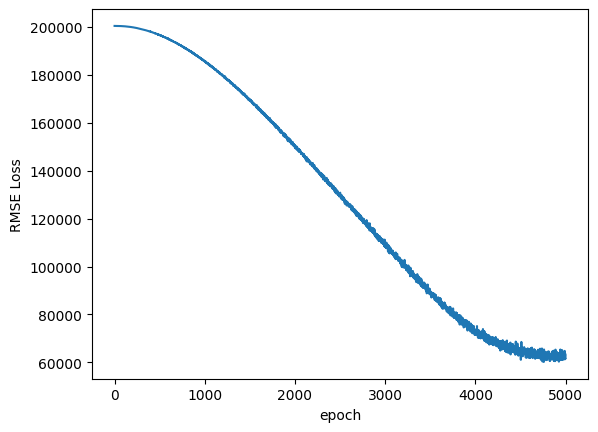

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import torch
%matplotlib inline
if isinstance(final_losses, list):
    final_losses = [loss.detach().numpy() if isinstance(loss, torch.Tensor) else loss for loss in final_losses]

final_losses = np.array(final_losses)

# Plotting the data
plt.plot(range(len(final_losses)), final_losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch')
plt.show()


In [54]:
#### Validate the Test Data
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))


RMSE: 57763.546875


In [55]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])

In [56]:

data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])

In [57]:

data_predicted

,Prediction
0,107386.117188
1,211603.296875
2,202357.125000
3,265263.468750
4,245021.031250
5,182692.687500
6,242007.718750
7,245315.968750
8,182356.171875
9,236579.062500


In [64]:

#### Saving The Model
#### Save the model
torch.save(model,'H_price.pt')

In [65]:
torch.save(model.state_dict(),'HouseWeights.pt')

In [66]:
### Loading the saved Model
embs_size=[(15, 8), (5, 3), (2, 1), (4, 2)]
model1=FeedForwardNN(embs_size,5,1,[100,50],p=0.4)

In [69]:
state_dict = torch.load('HouseWeights.pt')
model_dict = model1.state_dict()

# Filter out unnecessary keys
state_dict = {k: v for k, v in state_dict.items() if k in model_dict and v.size() == model_dict[k].size()}

# Load the new state dict
model_dict.update(state_dict)
model1.load_state_dict(model_dict)


<All keys matched successfully>

In [70]:
import torch.nn as nn

class FeedForwardNN(nn.Module):
    def __init__(self):
        super(FeedForwardNN, self).__init__()
        # Adjusting batch norm layer to match saved weights
        self.bn_cont = nn.BatchNorm1d(1)  # Change 1 to 5 if that's the required dimension
        # Other layers should be defined to match the saved model

model1 = FeedForwardNN()


In [62]:

model1.eval()

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)